In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


First we included the csv file of data giving the detials of pateints and history of hear related disease

Given a name to the data file and started analysing the data 

In [54]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Here in the data 
cp is for chest pain value given a range  of 0-3
The following attributes  are







*   trestbps : resting blood pressure
*   chol : serum cholestoral
*   fbs : fasting blood sugar
*   restecg : resting electrocardiographic results
*   thalach : maximum heart rate achieved 
*   exang : exercise induced angina
*   oldpeak : ST depression induced by exercise relative to rest
*   slope : slope of peak exercise ST segment
*   ca : number of major vessel colored flouroscopy

*   thal : 3 values 0,1,2 0=normal; 1=fixed defect; 2=reversable defect;
*   target: has mtwo values 0 and 1 where 0=less chance of heart attack 1=more chance of heart attack

















In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking for null values in the column age 

In [56]:
df['age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: age, Length: 303, dtype: bool

For ensuring no more other values viewing the unique vales of the column age

In [57]:
df['age'].unique()

array(['63', '37', '41', '56', '57', '44', '52', '54', '48', '49', '64',
       '58', '50', '66', '43', nan, '59', '42', '61', '40', '71', '51',
       '65', '46', '45', '53', '39', '47', 'unknown ', '62', '34', '35',
       '29', '55', '60', '67', '68', '69', '74', '76', '70', '38', '77'],
      dtype=object)

Same way analysing the values of column sex for errors

In [58]:
df['sex'].unique()

array([1, 0])

Aanalysing the columns of cp of errors

In [59]:
df['cp'].unique()

array(['3', '2', '1', '0', 'unknown'], dtype=object)

For obtaining   the number of null vlaues present in the dataset column age usin loc and index  

In [60]:
df.loc[df['age'].isnull()].index

Int64Index([19, 29, 203, 210, 218, 268], dtype='int64')

Using drop function to remove the null values and impling it to the  main file 

In [61]:
df.drop(df.loc[df['age'].isnull()].index,inplace=True )

Similarly checking for more undefined terms and removing accordingly to make the data set free from errors and applicable

In [62]:
df.loc[df['age'] =='unknown ']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
49,unknown,0,0,138,234,0,0,160,0,0.0,2,0,2,1
64,unknown,1,2,140,211,1,0,165,0,0.0,2,0,2,1
263,unknown,0,0,108,269,0,1,169,1,1.8,1,2,2,0


In [63]:
df.drop(df.loc[df['age'] == 'unknown '].index,inplace=True )

In [64]:
df['age'].unique()

array(['63', '37', '41', '56', '57', '44', '52', '54', '48', '49', '64',
       '58', '50', '66', '43', '59', '42', '61', '40', '71', '51', '65',
       '46', '45', '53', '39', '47', '62', '34', '35', '29', '55', '60',
       '67', '68', '69', '74', '76', '70', '38', '77'], dtype=object)

In [65]:
df['cp'].unique()

array(['3', '2', '1', '0', 'unknown'], dtype=object)

In [66]:
df.drop(df.loc[df['cp'] == 'unknown'].index,inplace=True )

In [67]:
df['cp'].unique()

array(['3', '2', '1', '0'], dtype=object)

Obtaining  an idea of the data set the average values and its variation and other properties.

In [94]:
df.describe()

,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.681507,131.482877,246.681507,0.140411,0.537671,149.561644,0.328767,1.029452,1.400685,0.729452,2.315068,0.544521
std,0.466692,17.504336,52.394531,0.348009,0.526238,23.110662,0.470572,1.163398,0.615158,1.028171,0.617649,0.498869
min,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,130.000000,241.500000,0.000000,1.000000,153.000000,0.000000,0.750000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,140.000000,275.250000,0.000000,1.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Defining another variable for specific value to the data set file making to another dataset

In [68]:
target =df[df['target']==1]
target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [69]:
target.shape

(159, 14)

In [70]:
no_target =df[df['target']==0]
no_target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [71]:
no_target.shape

(133, 14)

Percentage idea about the  probablity can be obtained by printing the total data set index no with specified characterestics

In [72]:
print("  target =1 :" ,1*len(target) / len(df)   *100)
print("  target =0 :" ,1*len(no_target) / len(df)   *100)

  target =1 : 54.45205479452054
  target =0 : 45.54794520547945


Plotting the  values with respect to the target values with each attirbute of age and other parametes to analyse the relation 

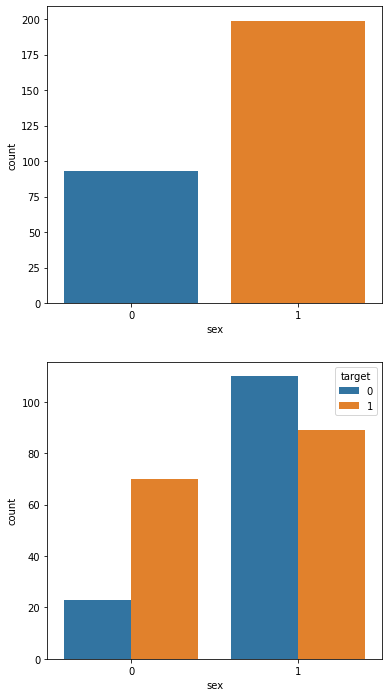

In [73]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x='sex' ,data=df)
plt.subplot(212)
sns.countplot(x='sex',hue='target' ,data=df)

In [74]:
for sex in df['sex'].unique():
    print(sex)

1
0


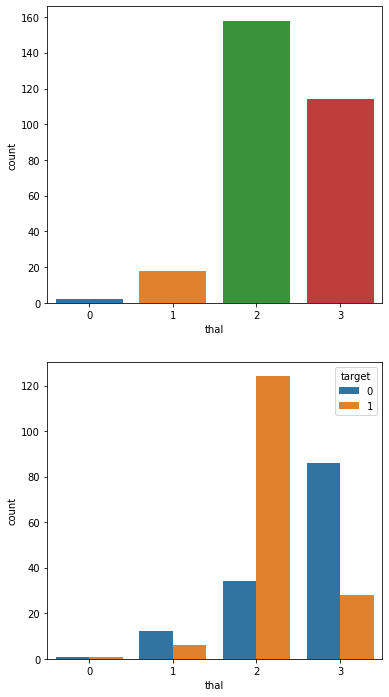

In [75]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x='thal' ,data=df)
plt.subplot(212)
sns.countplot(x='thal',hue='target' ,data=df)

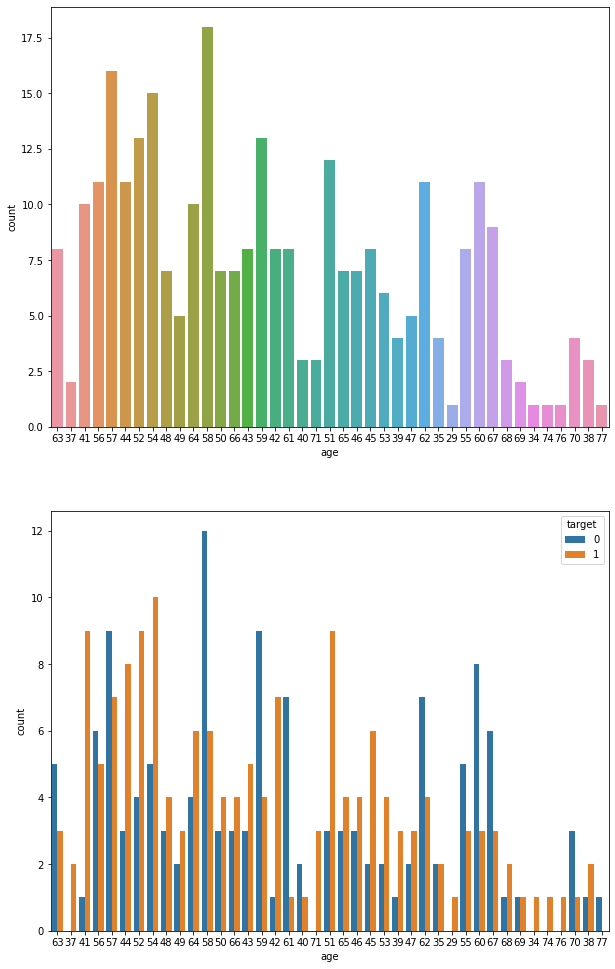

In [76]:
plt.figure(figsize=(10,17))
plt.subplot(211)
sns.countplot(x='age' ,data=df)
plt.subplot(212)
sns.countplot(x='age',hue='target' ,data=df)

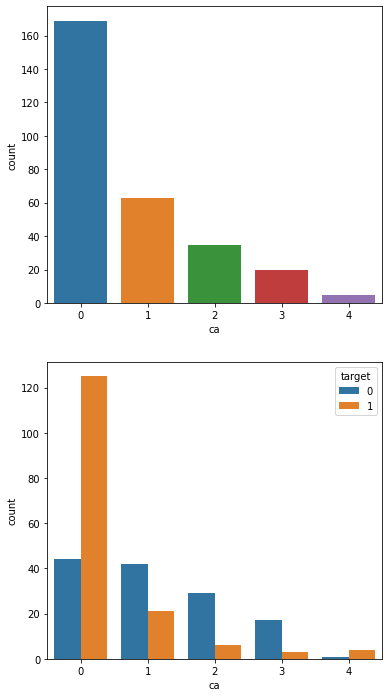

In [77]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x='ca' ,data=df)
plt.subplot(212)
sns.countplot(x='ca',hue='target' ,data=df)

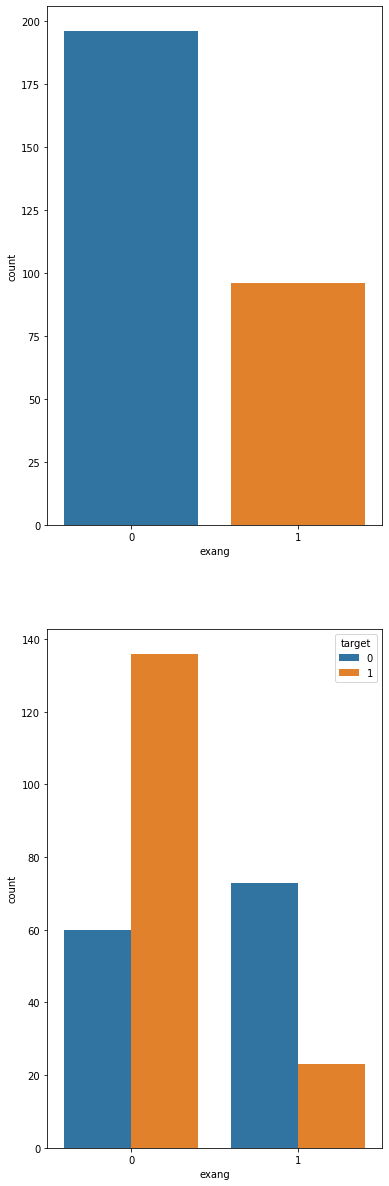

In [78]:
plt.figure(figsize=(6,21))
plt.subplot(211)
sns.countplot(x='exang' ,data=df)
plt.subplot(212)
sns.countplot(x='exang',hue='target' ,data=df)

In [79]:
for gen in df['sex'].unique():
    print(gen)
    gender_df = df[ df['sex']==gen ]
    survived = gender_df[ gender_df['target']==1 ]
    survived_percentage = ( survived.shape[0] / gender_df.shape[0] ) * 100
    print("Count: ", gender_df.shape[0])
    print("Servived  : ", "%.2f" % survived_percentage, '%')
    
    print("------------")

1
Count:  199
Servived  :  44.72 %
------------
0
Count:  93
Servived  :  75.27 %
------------


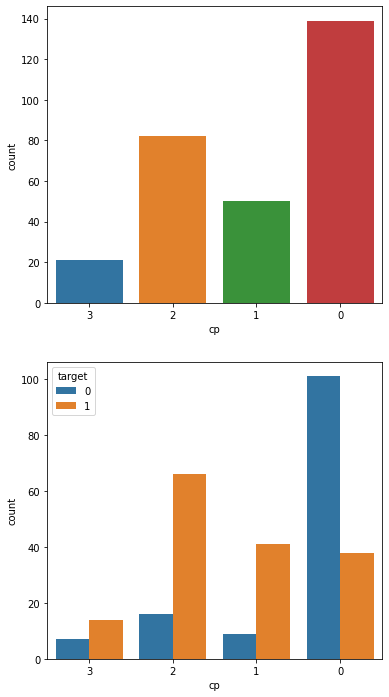

In [80]:
plt.figure(figsize=(6,12))
plt.subplot(211)
sns.countplot(x='cp' ,data=df)
plt.subplot(212)
sns.countplot(x='cp' ,hue='target',data=df)

In [81]:
X = df.drop('target', axis = 1).values
y = df['target'].values

Training and testing the data machine learning.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [83]:
X_train

array([['63', 1, '0', ..., 2, 2, 3],
       ['62', 0, '0', ..., 0, 2, 2],
       ['55', 0, '0', ..., 1, 1, 3],
       ...,
       ['51', 0, '2', ..., 2, 1, 2],
       ['67', 1, '0', ..., 1, 3, 2],
       ['48', 1, '0', ..., 2, 0, 2]], dtype=object)

In [84]:
X_test

array([['57', 1, '0', 110, 335, 0, 1, 143, 1, 3.0, 1, 1, 3],
       ['44', 1, '1', 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3],
       ['61', 0, '0', 130, 330, 0, 0, 169, 0, 0.0, 2, 0, 2],
       ['45', 0, '1', 130, 234, 0, 0, 175, 0, 0.6, 1, 0, 2],
       ['51', 1, '0', 140, 261, 0, 0, 186, 1, 0.0, 2, 0, 2],
       ['43', 0, '2', 122, 213, 0, 1, 165, 0, 0.2, 1, 0, 2],
       ['44', 0, '2', 108, 141, 0, 1, 175, 0, 0.6, 1, 0, 2],
       ['58', 0, '3', 150, 283, 1, 0, 162, 0, 1.0, 2, 0, 2],
       ['57', 1, '2', 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2],
       ['70', 1, '1', 156, 245, 0, 0, 143, 0, 0.0, 2, 0, 2],
       ['70', 1, '2', 160, 269, 0, 1, 112, 1, 2.9, 1, 1, 3],
       ['58', 1, '0', 100, 234, 0, 1, 156, 0, 0.1, 2, 1, 3],
       ['61', 1, '0', 120, 260, 0, 1, 140, 1, 3.6, 1, 1, 3],
       ['35', 1, '0', 126, 282, 0, 0, 156, 1, 0.0, 2, 0, 3],
       ['60', 1, '0', 117, 230, 1, 1, 160, 1, 1.4, 2, 2, 3],
       ['39', 0, '2', 94, 199, 0, 1, 179, 0, 0.0, 2, 0, 2],
       ['54', 0, '2', 160

In [85]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [86]:
X_train.shape

(233, 13)

In [87]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
l.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_predict_test = l.predict(X_test)

In [89]:
y_predict_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [90]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [91]:
from sklearn.metrics import confusion_matrix ,classification_report

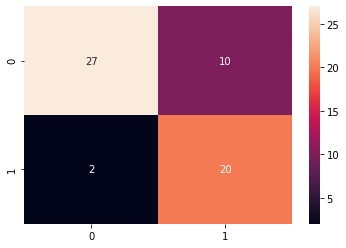

In [92]:
dff=confusion_matrix(y_test,y_predict_test)
sns.heatmap(dff, annot = True)

In [93]:
classification_report(y_test,y_predict_test)

'              precision    recall  f1-score   support\n\n           0       0.93      0.73      0.82        37\n           1       0.67      0.91      0.77        22\n\n    accuracy                           0.80        59\n   macro avg       0.80      0.82      0.79        59\nweighted avg       0.83      0.80      0.80        59\n'